In [2]:
import numpy as np
import random as r
import math
from matplotlib import pyplot as plt
from scipy import optimize as op

In [3]:
def gen(num, lower,upper):
    parameter = []
    for i in range(num):
        a = r.random()*(upper - lower) + lower
        phase = r.random()
        parameter.append([a,phase])
    return np.array(parameter)

def calculate_rms(data):
    
    sm = 0
    for element in data:
        sm += element * element
    sm = sm
    return math.sqrt(sm)

def calculate_box_rms(data,width):
    return calculate_rms(data)/(len(data))

In [4]:
param = gen(10,1,2)
print(param[:,0])

In [51]:
def objective(x, a, b, c):
    return a + b * np.power(x, c)

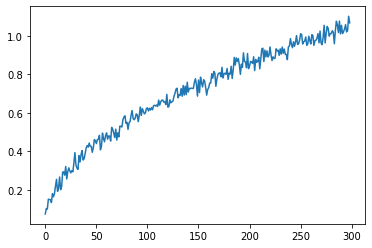

In [52]:
slope_ratio = []
ind_var = []
for i in range(1,300):
    ind_var.append(i)
    param = gen(i,0.01,0.1)
    slope_ratio.append(calculate_rms(param[:,0])/1)
    
plt.plot(slope_ratio)
#plt.yscale("log")
curve = op.curve_fit(objective,  ind_var,  slope_ratio)

In [53]:
print(curve)

(array([0.00703853, 0.0594096 , 0.50259308]), array([[ 1.97404637e-04, -6.72365230e-05,  1.68984794e-04],
       [-6.72365230e-05,  2.45068314e-05, -6.27042366e-05],
       [ 1.68984794e-04, -6.27042366e-05,  1.61308165e-04]]))


In [61]:
def draw_curve(curve_p, x_arr):
    y = [0] * len(x_arr)
    for i in range(len(x_arr)):
        y[i] = curve_p[0][0] + curve_p[0][1] * pow(x_arr[i],curve_p[0][2])
    return y

y = draw_curve(curve, ind_var)
        


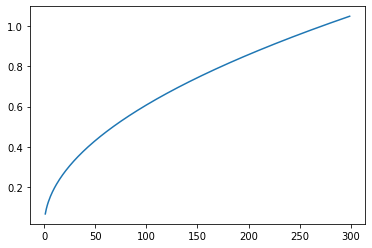

In [62]:
plt.plot(ind_var, y)

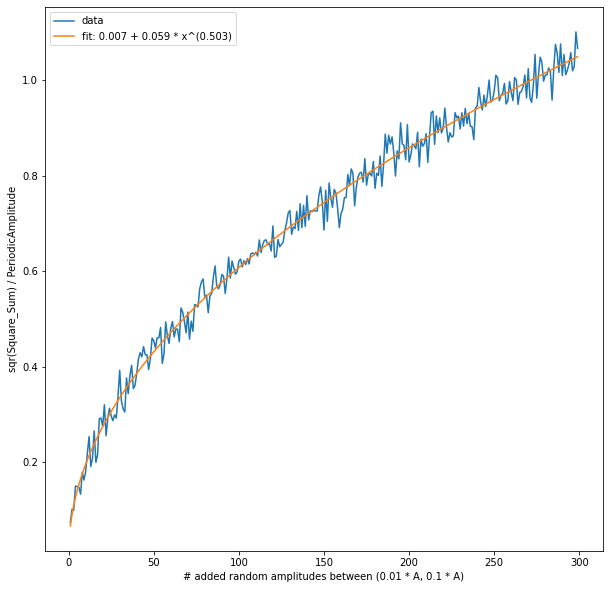

In [75]:
fig = plt.figure(figsize = (10,10))
plt.plot(ind_var,slope_ratio, label='data')
plt.plot(ind_var,y, label=f'fit: {round(curve[0][0],3)} + {round(curve[0][1],3)} * x^({round(curve[0][2],3)})')
plt.ylabel("sqr(Square_Sum) / PeriodicAmplitude")
plt.xlabel("# added random amplitudes between (0.01 * A, 0.1 * A)")
plt.legend()

